# Audio Exploration: Characteristics, Distribution, Frequency and Spectrograms:

In [74]:
import librosa
from librosa.display import waveshow, specshow, cmap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path, PurePath
import os

import warnings
warnings.filterwarnings("ignore")

In [13]:
DATA_DIR = Path("./dataset/batches")

In [29]:
# random files for research
def return_samples_path(data_directory, n_samples):
    if n_samples == 1:
        return [Path(data_directory, file) for file in np.random.choice(os.listdir(data_directory), n_samples)][0]
    return [Path(data_directory, file) for file in np.random.choice(os.listdir(data_directory), n_samples)]

In [62]:
# get random files for exploration
sample_paths = return_samples_path(data_directory = DATA_DIR, n_samples = 300)

In [63]:
def get_audio_stats(audio_path):
    signal, sr = librosa.load(audio_path, sr = None, mono = False)
    # Channel determination
    channels = "stereo" if len(signal.shape) > 1 and signal.shape[0] == 2 else "mono"
    # Root-mean-square energy (RMSE)
    rmse = np.mean(librosa.feature.rms(y=signal))
    # Average Zero crossing rate
    zcr = np.mean(librosa.zero_crossings(y=signal, pad = False)) / len(signal)
    # Mean amplitude 
    ma = np.mean(signal)
    # Median amplitude
    mda = np.median(signal)
    return {
        "sample_rate" : sr,
        "duration": librosa.get_duration(y=signal, sr=sr),
        "channels": channels,
        "root_mean_square_energy": rmse,
        "zero_crossing_rate_avg": zcr,
        "mean_amplitude": ma,
        "median_amplitude": mda
    }

In [116]:
stats = pd.DataFrame({path: get_audio_stats(audio_path = path) for path in sample_paths}).T.reset_index()

In [117]:
stats.head()

,index,sample_rate,duration,channels,root_mean_square_energy,zero_crossing_rate_avg,mean_amplitude,median_amplitude
0,dataset\batches\9vVjQ4Nqq7M_segment_3.wav,44100,120.0,stereo,0.04471,0.040304,-0.000013,0.0
1,dataset\batches\oN8q7p57nZw_segment_24.wav,44100,120.0,stereo,0.182764,0.00315,-0.000057,-0.000183
2,dataset\batches\9vVjQ4Nqq7M_segment_8.wav,44100,120.0,stereo,0.049843,0.021817,-0.00001,0.000061
3,dataset\batches\ONFCdOEFuqc_segment_49.wav,44100,120.0,stereo,0.260757,0.002852,0.000094,0.000092
4,dataset\batches\oN8q7p57nZw_segment_1.wav,44100,120.0,stereo,0.146797,0.00338,-0.000043,0.0


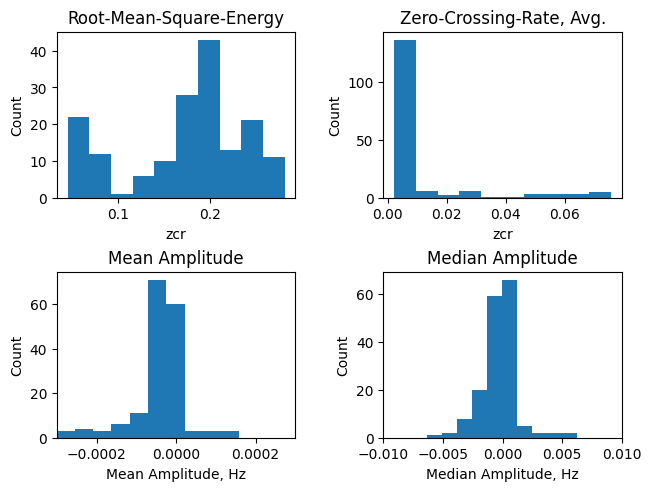

In [118]:
fig, ax = plt.subplots(2, 2, constrained_layout = True)

plt.subplot(2, 2, 1) 
plt.hist(stats.root_mean_square_energy)
plt.title("Root-Mean-Square-Energy")
plt.ylabel("Count")
plt.xlabel("zcr")

plt.subplot(2, 2, 2) 
plt.hist(stats.zero_crossing_rate_avg)
plt.title("Zero-Crossing-Rate, Avg.")
plt.ylabel("Count")
plt.xlabel("zcr")


plt.subplot(2, 2, 3) 
plt.hist(stats.mean_amplitude)
plt.title("Mean Amplitude")
plt.ylabel("Count")
plt.xlim(-0.0003, 0.0003)
plt.xlabel("Mean Amplitude, Hz")

plt.subplot(2, 2, 4) 
plt.hist(stats.median_amplitude)
plt.title("Median Amplitude")
plt.ylabel("Count")
plt.xlabel("Median Amplitude, Hz")
plt.xlim(-0.01, 0.01)
plt.show();


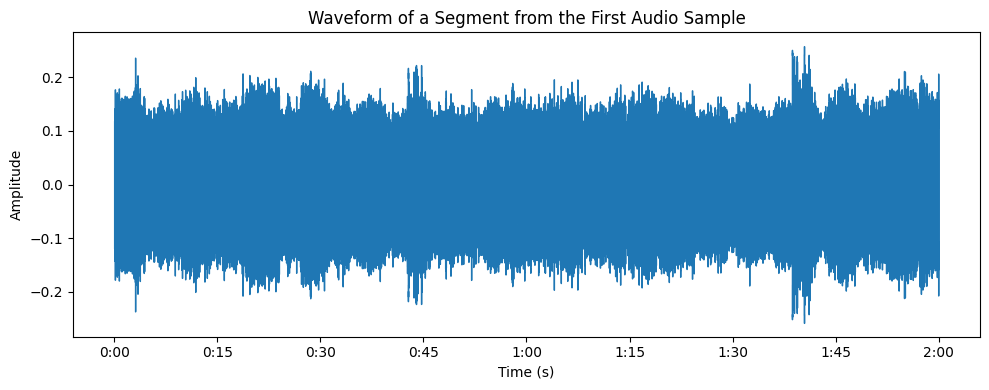

In [119]:
signal, sr = librosa.load(sample_paths[0], sr = None)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(signal, sr=sr)
plt.title("Waveform of a Segment from the First Audio Sample")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()